In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from simsimpy import *

[ 1.         -1.99822285  0.99822443] [3.94433640e-07 7.88867279e-07 3.94433640e-07]


c:\Users\claes\miniconda3\Lib\site-packages\scipy\signal\_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


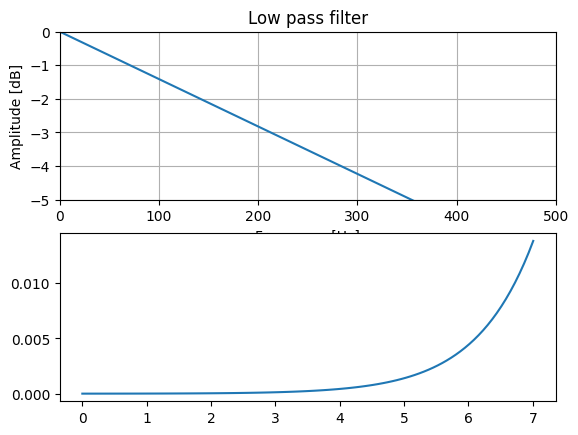

In [8]:
T = 1/200
fc = 15e3
fs = 1e6
N = 10

msk_data, t, data, phase = generate_msk(N, 0.5, T, fc, fs, 0.1*T)
f_msk_data, fft_msk_data = signal.welch(msk_data, fs, nperseg=len(msk_data))
# use only positive frequencies
f_msk_data = f_msk_data[:len(f_msk_data)//2]
fft_msk_data = fft_msk_data[:len(fft_msk_data)//2]
# downconvert

msk_data_down = np.zeros_like(msk_data,dtype=complex)
msk_data_down = msk_data*np.exp(-1j*2*np.pi*fc*t)
f_msk_data_down, fft_msk_data_down = signal.welch(msk_data_down, fs, nperseg=len(msk_data_down))
# use only positive frequencies
f_msk_data_down = f_msk_data_down[:len(f_msk_data_down)//2]
fft_msk_data_down = fft_msk_data_down[:len(fft_msk_data_down)//2]

# low pass filter
sos = signal.butter(2,1/T, 'low', output='sos', fs=fs)
b, a = signal.butter(2, 1/T, 'low',output='ba', analog=False, fs=fs)
w, h = signal.sosfreqz(sos, fs=fs)
msk_data_down_filtered = signal.sosfiltfilt(sos, msk_data_down) 
f_msk_data_down_filtered, fft_msk_data_down_filtered = signal.welch(msk_data_down_filtered, fs, nperseg=len(msk_data_down_filtered))
# use only positive frequencies
f_msk_data_down_filtered = f_msk_data_down_filtered[:len(f_msk_data_down_filtered)//2]
fft_msk_data_down_filtered = fft_msk_data_down_filtered[:len(fft_msk_data_down_filtered)//2]

fig, axs = plt.subplots(2,1)

axs[0].plot(w,10*np.log10(abs(h)))
#axs[0].plot(w,abs(h))
axs[0].set_title('Low pass filter')
axs[0].set_xlabel('Frequency [Hz]')
axs[0].set_ylabel('Amplitude [dB]')
axs[0].grid()
axs[0].set_xlim(0,0.5e3)
axs[0].set_ylim(-5,0)

t_impulse, y_impulse = signal.dimpulse((b,a,1/fs), n=100)
t_impulse, y_impulse = signal.impulse((b,a))
print(a,b)
axs[1].plot(t_impulse, y_impulse)


(0.0, 10000.0)

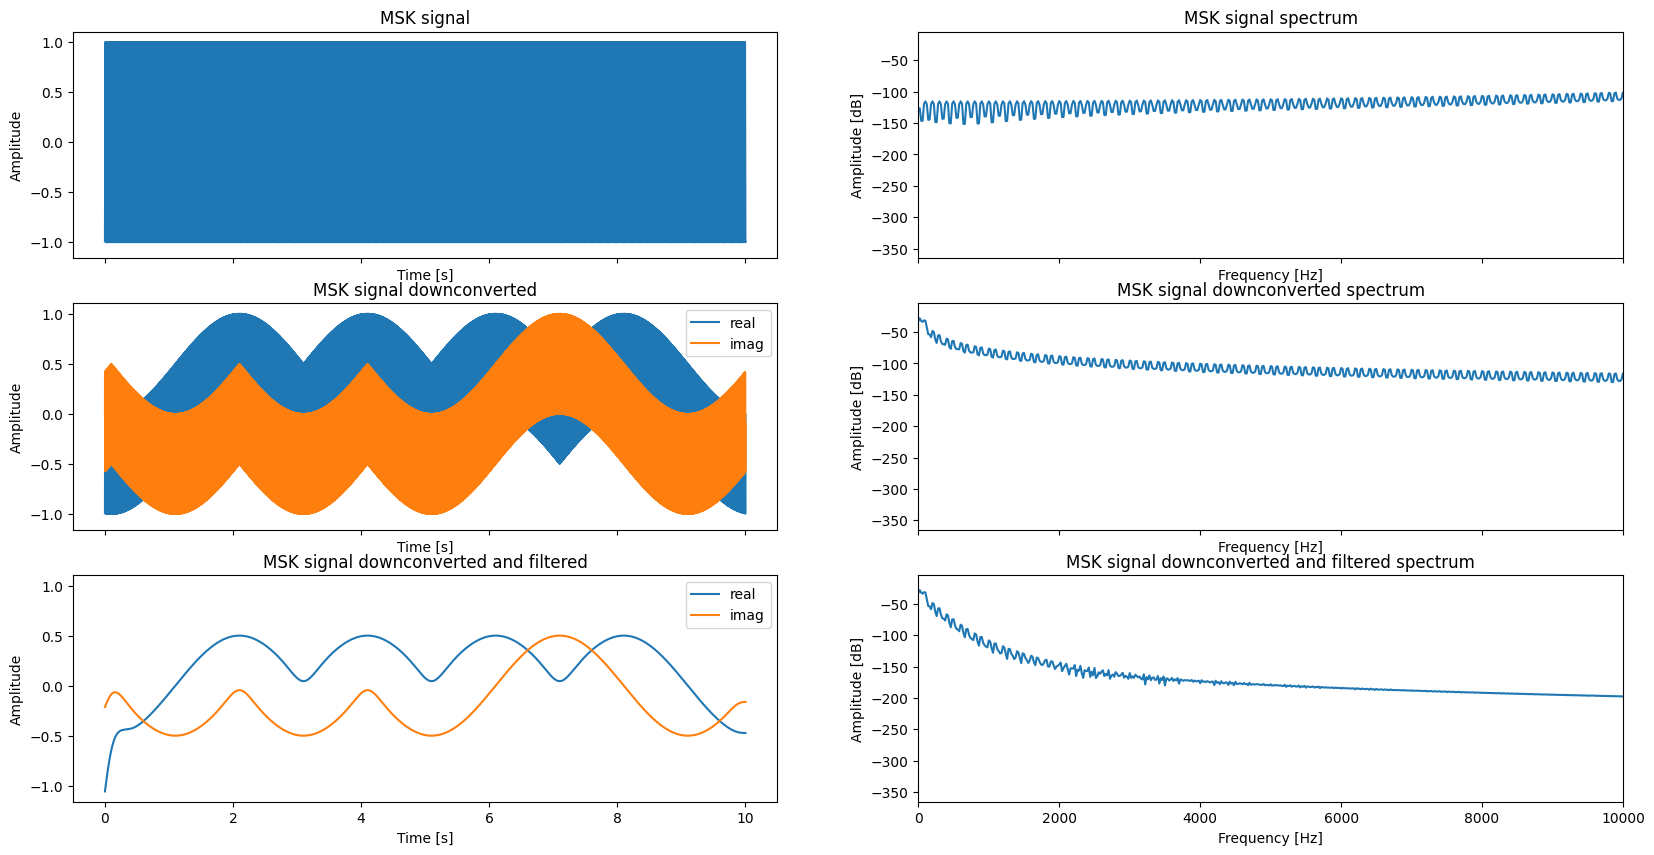

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10), sharex='col', sharey='col')

axs[0, 0].plot(t/T, msk_data)
axs[0, 0].set_title('MSK signal')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(f_msk_data, 10*np.log10(fft_msk_data))
axs[0, 1].set_title('MSK signal spectrum')
axs[0, 1].set_xlabel('Frequency [Hz]')
axs[0, 1].set_ylabel('Amplitude [dB]')
axs[0, 1].set_xlim(0, 1e4)

axs[1, 0].plot(t/T, msk_data_down.real, label='real')
axs[1, 0].plot(t/T, msk_data_down.imag, label='imag')
axs[1, 0].set_title('MSK signal downconverted')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].legend()

axs[1, 1].plot(f_msk_data_down, 10*np.log10(fft_msk_data_down))
axs[1, 1].set_title('MSK signal downconverted spectrum')
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Amplitude [dB]')
axs[1, 1].set_xlim(0, 1e4)

axs[2, 0].plot(t/T, msk_data_down_filtered.real, label='real')
axs[2, 0].plot(t/T, msk_data_down_filtered.imag, label='imag')
axs[2, 0].set_title('MSK signal downconverted and filtered')
axs[2, 0].set_xlabel('Time [s]')
axs[2, 0].set_ylabel('Amplitude')
axs[2, 0].legend()

axs[2, 1].plot(f_msk_data_down_filtered, 10*np.log10(fft_msk_data_down_filtered))
axs[2, 1].set_title('MSK signal downconverted and filtered spectrum')
axs[2, 1].set_xlabel('Frequency [Hz]')
axs[2, 1].set_ylabel('Amplitude [dB]')
axs[2, 1].set_xlim(0, 1e4)



c:\Users\claes\miniconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\claes\miniconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


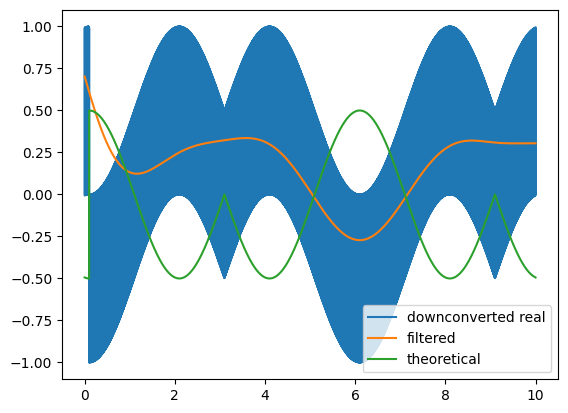

In [4]:
plt.plot(t/T,msk_data_down.real, label = 'downconverted real')
plt.plot(t/T,msk_data_down_filtered, label = 'filtered')
plt.plot(t/T,np.exp(1j*phase)/2, label = 'theoretical')
#plt.plot(t/T,signal.sosfiltfilt(sos, np.exp(1j*phase))/2 )
plt.legend()

(0.0, 10000.0)

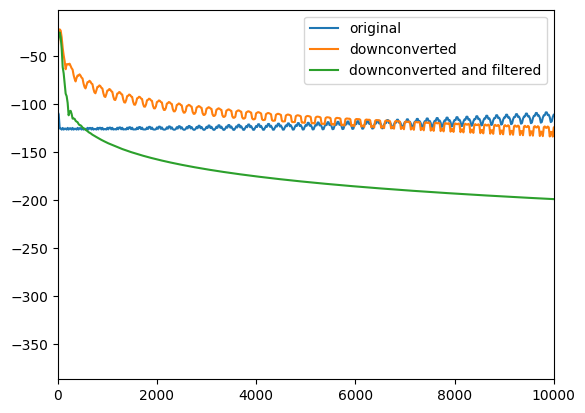

In [5]:
plt.plot(f_msk_data, 10*np.log10(fft_msk_data), label='original')
plt.plot(f_msk_data_down, 10*np.log10(fft_msk_data_down), label='downconverted')
plt.plot(f_msk_data_down_filtered, 10*np.log10(fft_msk_data_down_filtered), label='downconverted and filtered')
plt.legend()
plt.xlim(0,1e4)

(0.0, 10000.0)

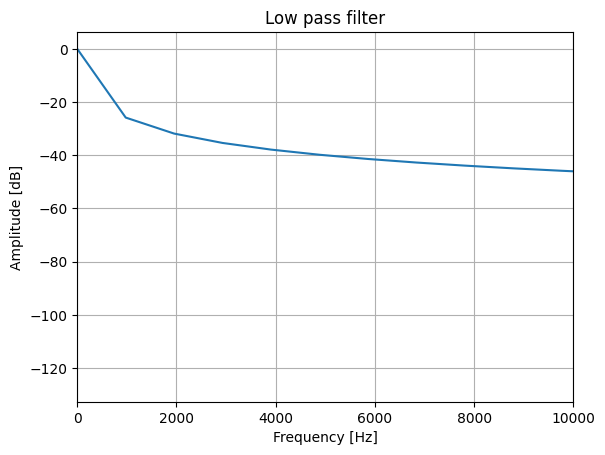

In [6]:

fc = 15.5e3

msk_data_shifted, t_shifted, phase_shifted = generate_msk_data(data, T, fc, fs, offset=0.1*T)
f_msk_data_shifted, fft_msk_data_shifted = signal.welch(msk_data_shifted, fs, nperseg=len(msk_data_shifted))
# use only positive frequencies
f_msk_data_shifted = f_msk_data_shifted[:len(f_msk_data_shifted)//2]
fft_msk_data_shifted = fft_msk_data_shifted[:len(fft_msk_data_shifted)//2]
# downconvert

msk_data_down_shifted = np.zeros_like(msk_data_shifted,dtype=complex)
msk_data_down_shifted = msk_data_shifted*np.exp(-1j*2*np.pi*fc*t_shifted)
f_msk_data_down_shifted, fft_msk_data_down_shifted = signal.welch(msk_data_down_shifted, fs, nperseg=len(msk_data_down))
# use only positive frequencies
f_msk_data_down_shifted = f_msk_data_down_shifted[:len(f_msk_data_down_shifted)//2]
fft_msk_data_down_shifted = fft_msk_data_down_shifted[:len(fft_msk_data_down_shifted)//2]

# low pass filter
sos = signal.butter(2,0.0001, 'low', output='sos')
w, h = signal.sosfreqz(sos, fs=fs)
msk_data_down_filtered_shifted = signal.sosfiltfilt(sos, msk_data_down_shifted) 
f_msk_data_down_filtered_shifted, fft_msk_data_down_filtered_shifted = signal.welch(msk_data_down_filtered_shifted, fs, nperseg=len(msk_data_down_filtered_shifted))
# use only positive frequencies
f_msk_data_down_filtered_shifted = f_msk_data_down_filtered_shifted[:len(f_msk_data_down_filtered_shifted)//2]
fft_msk_data_down_filtered_shifted = fft_msk_data_down_filtered_shifted[:len(fft_msk_data_down_filtered_shifted)//2]

plt.plot(w,10*np.log10(abs(h)))
plt.title('Low pass filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.xlim(0,1e4)

(0.0, 10000.0)

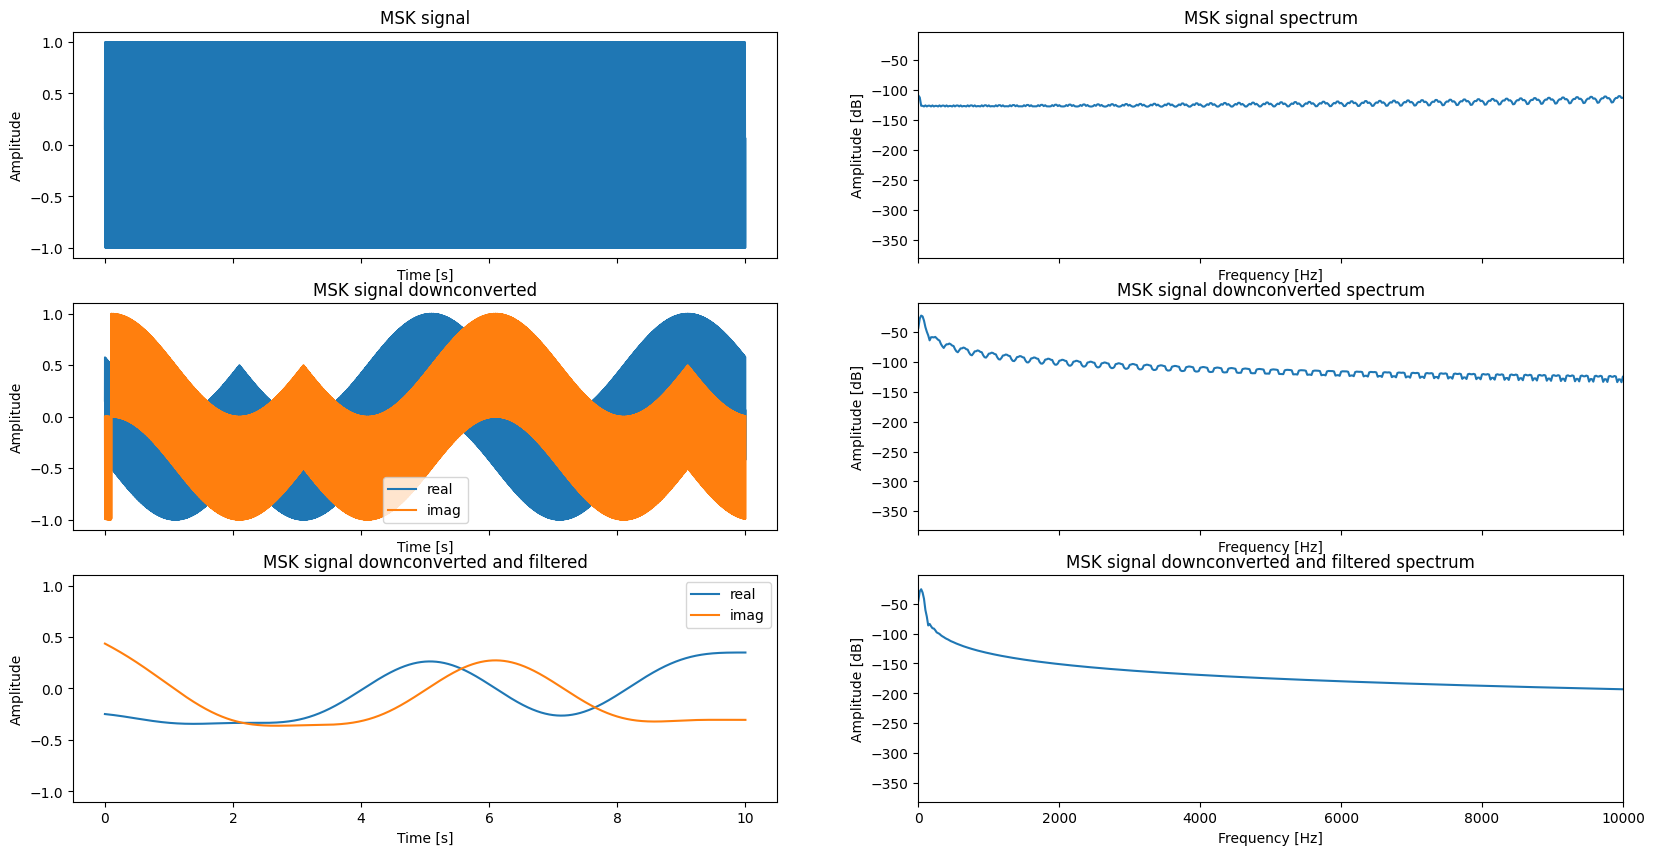

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10), sharex='col', sharey='col')

axs[0, 0].plot(t_shifted/T, msk_data_shifted)
axs[0, 0].set_title('MSK signal')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(f_msk_data_shifted, 10*np.log10(fft_msk_data_shifted))
axs[0, 1].set_title('MSK signal spectrum')
axs[0, 1].set_xlabel('Frequency [Hz]')
axs[0, 1].set_ylabel('Amplitude [dB]')
axs[0, 1].set_xlim(0, 1e4)

axs[1, 0].plot(t_shifted/T, msk_data_down_shifted.real, label='real')
axs[1, 0].plot(t_shifted/T, msk_data_down_shifted.imag, label='imag')
axs[1, 0].set_title('MSK signal downconverted')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].legend()

axs[1, 1].plot(f_msk_data_down_shifted, 10*np.log10(fft_msk_data_down_shifted))
axs[1, 1].set_title('MSK signal downconverted spectrum')
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Amplitude [dB]')
axs[1, 1].set_xlim(0, 1e4)

axs[2, 0].plot(t_shifted/T, msk_data_down_filtered_shifted.real, label='real')
axs[2, 0].plot(t_shifted/T, msk_data_down_filtered_shifted.imag, label='imag')
axs[2, 0].set_title('MSK signal downconverted and filtered')
axs[2, 0].set_xlabel('Time [s]')
axs[2, 0].set_ylabel('Amplitude')
axs[2, 0].legend()

axs[2, 1].plot(f_msk_data_down_filtered_shifted, 10*np.log10(fft_msk_data_down_filtered_shifted))
axs[2, 1].set_title('MSK signal downconverted and filtered spectrum')
axs[2, 1].set_xlabel('Frequency [Hz]')
axs[2, 1].set_ylabel('Amplitude [dB]')
axs[2, 1].set_xlim(0, 1e4)

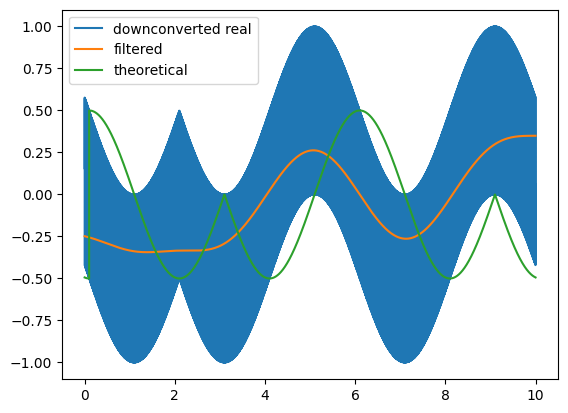

In [8]:
plt.plot(t/T,msk_data_down_shifted.real, label = 'downconverted real')
plt.plot(t/T,msk_data_down_filtered_shifted, label = 'filtered')
plt.plot(t/T,np.exp(1j*phase_shifted)/2, label = 'theoretical')
#plt.plot(t/T,signal.sosfiltfilt(sos, np.exp(1j*phase))/2 )
plt.legend()

# compare

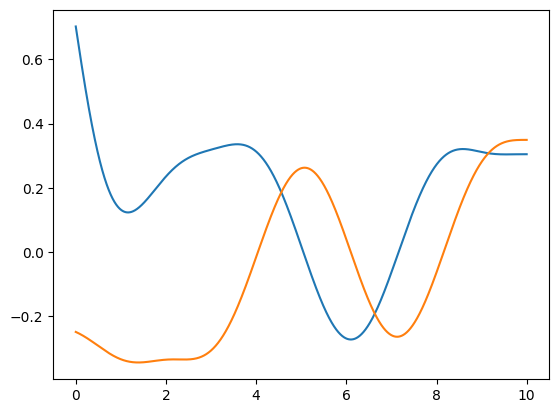

In [9]:
plt.plot(t/T,msk_data_down_filtered, label='non shifted')
plt.plot(t/T,msk_data_down_filtered_shifted, label='shifted')

# low carrier frequency

(0.0, 500.0)

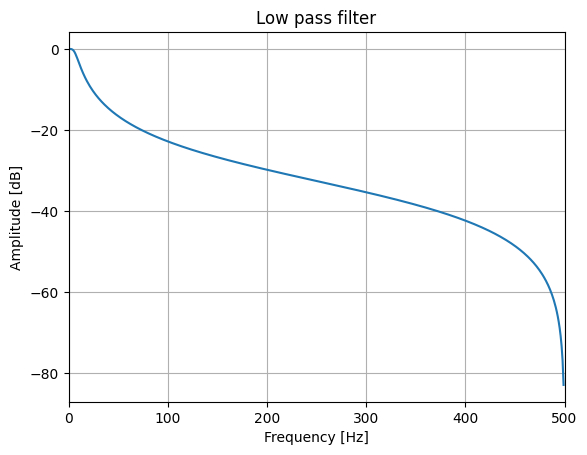

In [29]:
T = 1/10
fc = 1/T*1.25
fs = 1e3
N = 10

msk_data, t, data, phase = generate_msk(N, 0.5, T, fc, fs, 0.1*T)
f_msk_data, fft_msk_data = signal.welch(msk_data, fs, nperseg=len(msk_data))
# use only positive frequencies
f_msk_data = f_msk_data[:len(f_msk_data)//2]
fft_msk_data = fft_msk_data[:len(fft_msk_data)//2]
# downconvert

msk_data_down = np.zeros_like(msk_data,dtype=complex)
msk_data_down = msk_data*np.exp(-1j*2*np.pi*fc*t)
f_msk_data_down, fft_msk_data_down = signal.welch(msk_data_down, fs, nperseg=len(msk_data_down))
# use only positive frequencies
f_msk_data_down = f_msk_data_down[:len(f_msk_data_down)//2]
fft_msk_data_down = fft_msk_data_down[:len(fft_msk_data_down)//2]

# low pass filter
sos = signal.butter(2,0.015, 'low', output='sos')
w, h = signal.sosfreqz(sos, fs=fs)
msk_data_down_filtered = signal.sosfiltfilt(sos, msk_data_down) 
f_msk_data_down_filtered, fft_msk_data_down_filtered = signal.welch(msk_data_down_filtered, fs, nperseg=len(msk_data_down_filtered))
# use only positive frequencies
f_msk_data_down_filtered = f_msk_data_down_filtered[:len(f_msk_data_down_filtered)//2]
fft_msk_data_down_filtered = fft_msk_data_down_filtered[:len(fft_msk_data_down_filtered)//2]

plt.plot(w,10*np.log10(abs(h)))
plt.title('Low pass filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.xlim(0,0.5e3)

(0.0, 500.0)

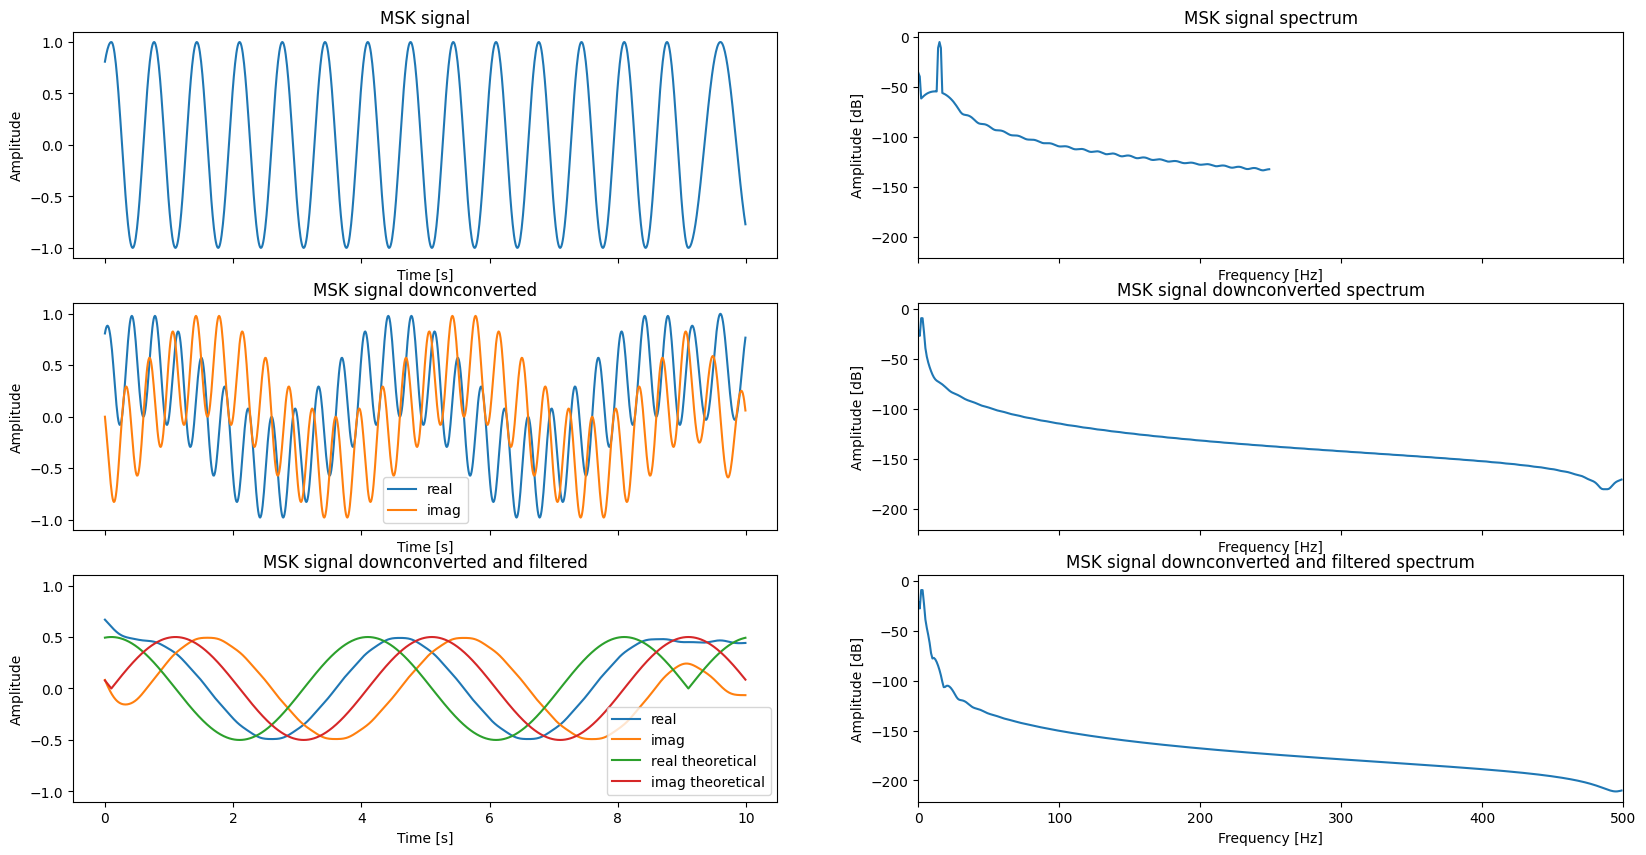

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10), sharex='col', sharey='col')

axs[0, 0].plot(t/T, msk_data)
axs[0, 0].set_title('MSK signal')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(f_msk_data, 10*np.log10(fft_msk_data))
axs[0, 1].set_title('MSK signal spectrum')
axs[0, 1].set_xlabel('Frequency [Hz]')
axs[0, 1].set_ylabel('Amplitude [dB]')
axs[0, 1].set_xlim(0, 0.5e3)

axs[1, 0].plot(t/T, msk_data_down.real, label='real')
axs[1, 0].plot(t/T, msk_data_down.imag, label='imag')
axs[1, 0].set_title('MSK signal downconverted')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].legend()

axs[1, 1].plot(f_msk_data_down, 10*np.log10(fft_msk_data_down))
axs[1, 1].set_title('MSK signal downconverted spectrum')
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Amplitude [dB]')
axs[1, 1].set_xlim(0, 0.5e3)

axs[2, 0].plot(t/T, msk_data_down_filtered.real, label='real')
axs[2, 0].plot(t/T, msk_data_down_filtered.imag, label='imag')
axs[2, 0].plot(t/T, 1/2*np.cos(phase), label='real theoretical')
axs[2, 0].plot(t/T, 1/2*np.sin(phase), label='imag theoretical')
axs[2, 0].set_title('MSK signal downconverted and filtered')
axs[2, 0].set_xlabel('Time [s]')
axs[2, 0].set_ylabel('Amplitude')
axs[2, 0].legend()

axs[2, 1].plot(f_msk_data_down_filtered, 10*np.log10(fft_msk_data_down_filtered))
axs[2, 1].set_title('MSK signal downconverted and filtered spectrum')
axs[2, 1].set_xlabel('Frequency [Hz]')
axs[2, 1].set_ylabel('Amplitude [dB]')
axs[2, 1].set_xlim(0, 0.5e3)

# with offset

14.0


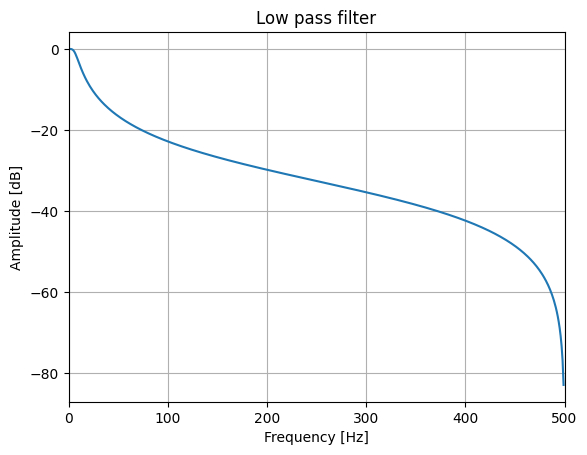

In [33]:
fc = 1/T*1.4

msk_data_shifted, t_shifted, phase_shifted = generate_msk_data(data, T, fc, fs, offset=0.1*T)
f_msk_data_shifted, fft_msk_data_shifted = signal.welch(msk_data_shifted, fs, nperseg=len(msk_data_shifted))
# use only positive frequencies
f_msk_data_shifted = f_msk_data_shifted[:len(f_msk_data_shifted)//2]
fft_msk_data_shifted = fft_msk_data_shifted[:len(fft_msk_data_shifted)//2]
# downconvert

msk_data_down_shifted = np.zeros_like(msk_data_shifted,dtype=complex)
msk_data_down_shifted = msk_data_shifted*np.exp(-1j*2*np.pi*fc*t_shifted)
f_msk_data_down_shifted, fft_msk_data_down_shifted = signal.welch(msk_data_down_shifted, fs, nperseg=len(msk_data_down))
# use only positive frequencies
f_msk_data_down_shifted = f_msk_data_down_shifted[:len(f_msk_data_down_shifted)//2]
fft_msk_data_down_shifted = fft_msk_data_down_shifted[:len(fft_msk_data_down_shifted)//2]

# low pass filter
sos = signal.butter(2,0.015, 'low', output='sos')
w, h = signal.sosfreqz(sos, fs=fs)
msk_data_down_filtered_shifted = signal.sosfiltfilt(sos, msk_data_down_shifted) 
f_msk_data_down_filtered_shifted, fft_msk_data_down_filtered_shifted = signal.welch(msk_data_down_filtered_shifted, fs, nperseg=len(msk_data_down_filtered_shifted))
# use only positive frequencies
f_msk_data_down_filtered_shifted = f_msk_data_down_filtered_shifted[:len(f_msk_data_down_filtered_shifted)//2]
fft_msk_data_down_filtered_shifted = fft_msk_data_down_filtered_shifted[:len(fft_msk_data_down_filtered_shifted)//2]

plt.plot(w,10*np.log10(abs(h)))
plt.title('Low pass filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.xlim(0,0.5e3)
print(fc)

(0.0, 500.0)

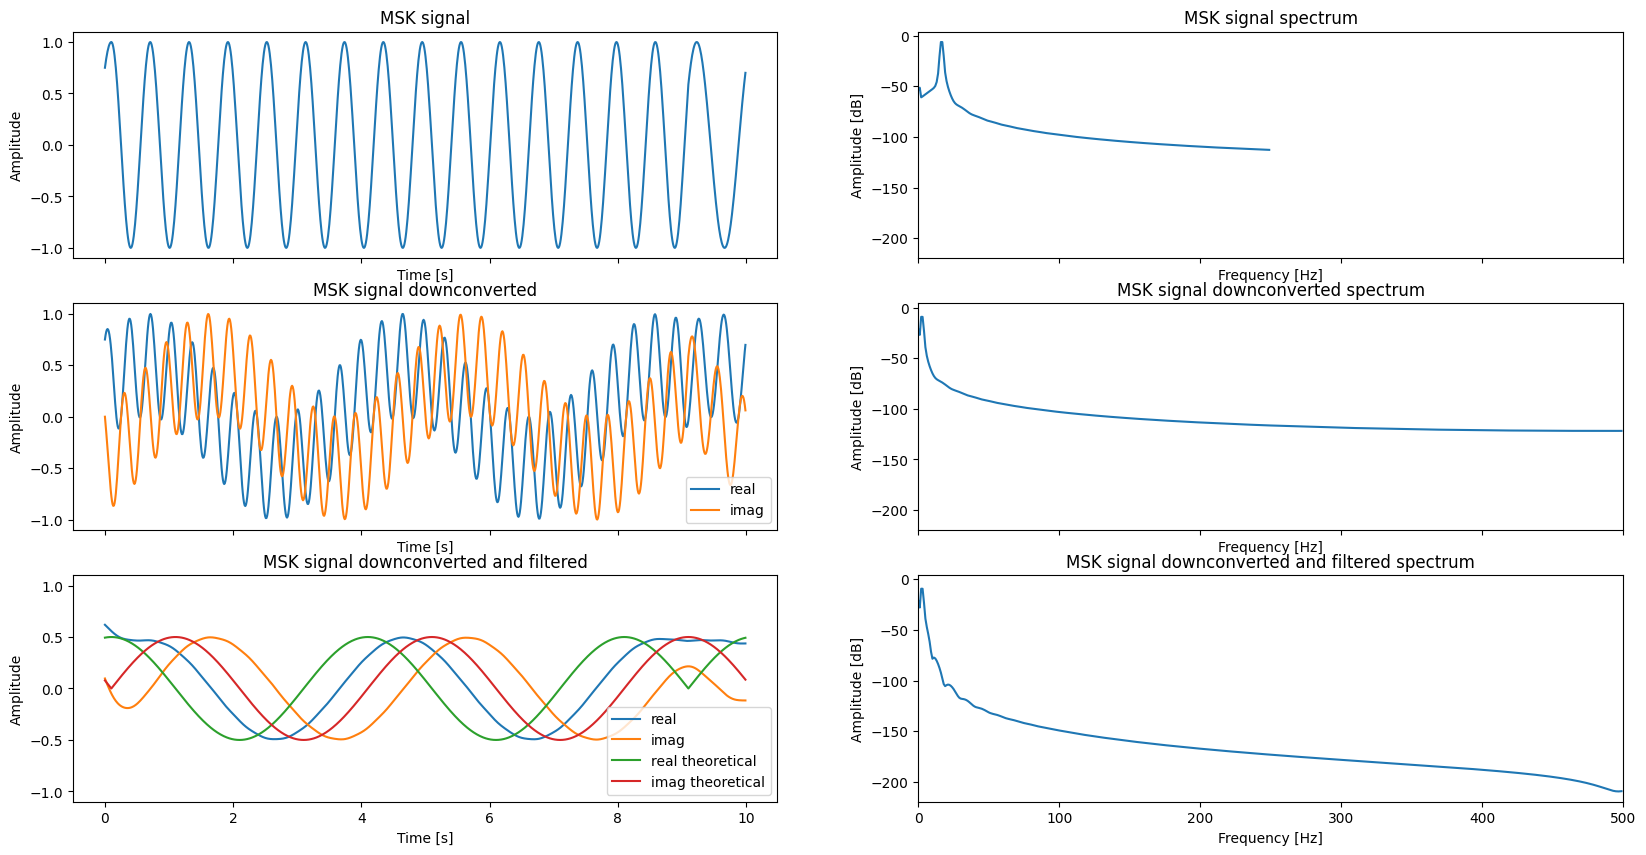

In [34]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10), sharex='col', sharey='col')

axs[0, 0].plot(t_shifted/T, msk_data_shifted)
axs[0, 0].set_title('MSK signal')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(f_msk_data_shifted, 10*np.log10(fft_msk_data_shifted))
axs[0, 1].set_title('MSK signal spectrum')
axs[0, 1].set_xlabel('Frequency [Hz]')
axs[0, 1].set_ylabel('Amplitude [dB]')
axs[0, 1].set_xlim(0, 0.5e3)

axs[1, 0].plot(t_shifted/T, msk_data_down_shifted.real, label='real')
axs[1, 0].plot(t_shifted/T, msk_data_down_shifted.imag, label='imag')
axs[1, 0].set_title('MSK signal downconverted')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].legend()

axs[1, 1].plot(f_msk_data_down_shifted, 10*np.log10(fft_msk_data_down_shifted))
axs[1, 1].set_title('MSK signal downconverted spectrum')
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Amplitude [dB]')
axs[1, 1].set_xlim(0, 0.5e3)

axs[2, 0].plot(t_shifted/T, msk_data_down_filtered_shifted.real, label='real')
axs[2, 0].plot(t_shifted/T, msk_data_down_filtered_shifted.imag, label='imag')
axs[2, 0].plot(t/T, 1/2*np.cos(phase), label='real theoretical')
axs[2, 0].plot(t/T, 1/2*np.sin(phase), label='imag theoretical')
axs[2, 0].set_title('MSK signal downconverted and filtered')
axs[2, 0].set_xlabel('Time [s]')
axs[2, 0].set_ylabel('Amplitude')
axs[2, 0].legend()

axs[2, 1].plot(f_msk_data_down_filtered_shifted, 10*np.log10(fft_msk_data_down_filtered_shifted))
axs[2, 1].set_title('MSK signal downconverted and filtered spectrum')
axs[2, 1].set_xlabel('Frequency [Hz]')
axs[2, 1].set_ylabel('Amplitude [dB]')
axs[2, 1].set_xlim(0, 0.5e3)